## IMBALANCED DATA

1.Load the dataset and explore the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#!pip install imblearn

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df_customer= pd.read_csv('customer_churn.csv')
df_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df_customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df_customer.columns=df_customer.columns.str.lower().str.replace(' ','_')

In [7]:
def change(x):
    if x =='Yes':
        return 1
    elif x == 'No':
         return 0
    else :
         return x
    
df_customer['churn'] = df_customer['churn'].apply(change)


In [8]:
df_customer.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [10]:
X_num = df_customer.select_dtypes(include=np.number)
X_num

,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


In [11]:
X_num.seniorcitizen.value_counts()


0    5901
1    1142
Name: seniorcitizen, dtype: int64

In [12]:
X_num.tenure.value_counts()


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [13]:
X_num.monthlycharges.value_counts()


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: monthlycharges, Length: 1585, dtype: int64

In [14]:
X_num.nunique()


seniorcitizen        2
tenure              73
monthlycharges    1585
churn                2
dtype: int64

In [15]:
X_cat=df_customer.select_dtypes(exclude=np.number)
X_cat

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6


In [16]:
X_cat.nunique()


customerid          7043
gender                 2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
totalcharges        6531
dtype: int64

 2 .We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [19]:
X= df_customer [['tenure' , 'seniorcitizen' , 'monthlycharges']]
y= df_customer[[ 'churn']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled_np

array([[-4.65683364e-01, -4.37749204e-01, -4.73723375e-04],
       [ 8.85536787e-01, -4.37749204e-01,  1.07475386e+00],
       [-1.28460467e+00, -4.37749204e-01, -1.37649913e+00],
       ...,
       [-8.34197950e-01, -4.37749204e-01, -1.45294499e+00],
       [-8.34197950e-01,  2.28441306e+00,  1.14953785e+00],
       [-2.60953038e-01, -4.37749204e-01, -1.49781538e+00]])

In [21]:
##NOS DA UNA LISTA DE VALORES, POR CADA UNA DE LAS FILAS np

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) # nombre de las columnas y el index ( que utilize el mismo indice de x_train.)
X_train_scaled

,tenure,seniorcitizen,monthlycharges
2142,-0.465683,-0.437749,-0.000474
1623,0.885537,-0.437749,1.074754
6074,-1.284605,-0.437749,-1.376499
1362,-1.161766,-0.437749,0.177346
6754,-1.325551,-0.437749,-0.098524
...,...,...,...
3772,-1.284605,-0.437749,1.001632
5191,-0.383791,-0.437749,0.872006
5226,-0.834198,-0.437749,-1.452945
5390,-0.834198,2.284413,1.149538


In [23]:
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns= X_train.columns, index=X_test.index)
X_test_scaled

,tenure,seniorcitizen,monthlycharges
185,-1.284605,-0.437749,-1.331629
2715,0.353238,-0.437749,-1.316672
3825,0.803645,-0.437749,-1.512772
1807,-1.284605,-0.437749,0.381756
132,1.417836,-0.437749,-0.475768
...,...,...,...
6366,1.294997,-0.437749,0.114195
315,0.762699,-0.437749,1.501854
2439,-0.629468,-0.437749,-1.494492
5002,1.499728,-0.437749,-0.695134


In [24]:
y_train

,churn
2142,0
1623,0
6074,1
1362,1
6754,0
...,...
3772,1
5191,0
5226,0
5390,1


In [25]:
y_test

,churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


In [26]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [27]:
lr.n_iter_

array([9], dtype=int32)

# 5. Build the logistic regression model.

In [28]:
predictions_train = lr.predict(X_train_scaled)
predictions_train

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
predictions_test = lr.predict(X_test_scaled)
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr.score(X_train_scaled, y_train)))

The accuracy of the model in the TRAIN set is: 0.79


In [31]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.81


In [32]:
y_test.shape ##hacemos un modelo tonto(dumb)

(1409, 1)

6. Evaluate the model.

In [33]:
dumb=np.zeros(1409)
dumb

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
accuracy_score(y_test,dumb)

0.7352732434350603

In [35]:
count_classes = df_customer ['churn'].value_counts()
count_classes

0    5174
1    1869
Name: churn, dtype: int64

In [36]:
count_classes[0], count_classes[1] 

(5174, 1869)

In [37]:
#class_imbalance = (count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])
(5174-1869)/(5174+1869)

0.46926025841260827

In [38]:
count_classes[1]/(count_classes[0]+count_classes[1])*100

26.536987079369588

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.70
The recall in the TEST set is: 0.49
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


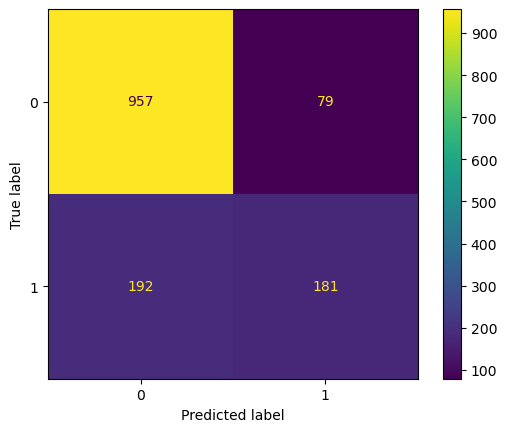

In [42]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [43]:
192 + 181


373

In [44]:
192/373

0.514745308310992

## Synthetic Minority Oversampling TEchnique (SMOTE)


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=100, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [41]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [42]:
y_train_SMOTE.value_counts()

churn
0        4138
1        4138
dtype: int64

In [43]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.43


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PODEMOS OBSERVAR QUE NUESTRO RECALL( NUESTRA CAPACIDAD DE PREDECIR LOS POSITIVOS  AUMENTO) EN  COMPARACION EN NUESTRO PRIMER MODELO.

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

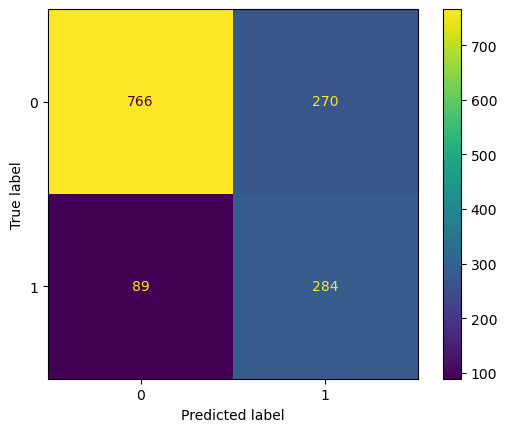

In [45]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [46]:
89+284

373

In [47]:
89/373

0.2386058981233244

## 8.Tomek links 

In [47]:
from imblearn.under_sampling import TomekLinks

In [48]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
y_train_tl.value_counts()

churn
0        3724
1        1496
dtype: int64

In [49]:
y_train.value_counts()

churn
0        4138
1        1496
dtype: int64

In [50]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tl, y_train_tl)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.55
The F1 in the TEST set is: 0.58
The Kappa in the TEST set is: 0.45


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


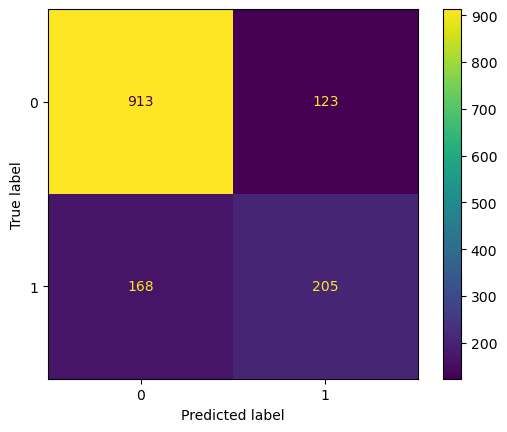

In [51]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [52]:
168 + 205

373

In [53]:
168/373

0.450402144772118

Podemos observar que nuestro mejor modelo fue SMOTE , mejoro nuestras predicciones a comparacion de nuestro primer modelo.